In [14]:
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

In [7]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
y_val.shape

(10000,)

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',  kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dropout(0.5)) 
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5)) 
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=rms, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

TypeError: Unexpected keyword argument passed to optimizer: learning_rate



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/20


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(512, 10000), b.shape=(10000, 16), m=512, n=16, k=10000
	 [[{{node dense_1/MatMul}}]]
	 [[loss/add_1/_139]]
  (1) Internal: Blas GEMM launch failed : a.shape=(512, 10000), b.shape=(10000, 16), m=512, n=16, k=10000
	 [[{{node dense_1/MatMul}}]]
0 successful operations.
0 derived errors ignored.

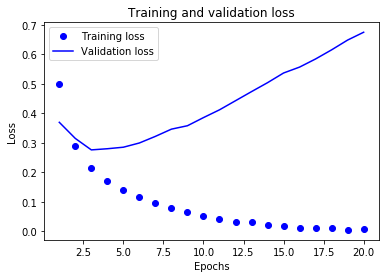

In [148]:
history_dict = history.history
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len( history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

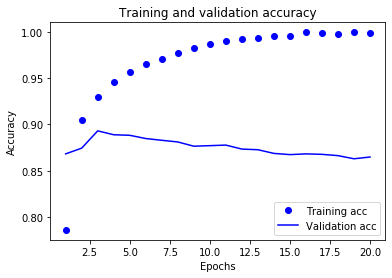

In [149]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()